# Set-Up

###Data

The data comes from a cellular usage dataset that consists of records of actual cell phone customers and features that include specific features to a customer's cell service like voice mail & international calling, service cost, customer usage, and a binary feature recording whether the customer cancelled their service or not (customer churn).

For this data, churn is defined as the customer cancelling their cellular plan at any given point in time.


Link - https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

Source: Kaggle

<br>

Variable Description:

- 'Churn' : 'yes' if the customer cancelled their service and 'no' if they did not

- 'CustServ_Calls' : denotes the number of customer service calls the customer made

- State : The US state the customer is from


- 'Account Weeks' : number of weeks the customer has had an active account

- 'Vmail_Message' : number of voice mail messages received

- 'Vmail_Plan' : whether the customer has opted for voice mail or not

###Project Goal

The goal is to use Python, Pandas and Machine Learning to build a model that uses information about each customer in this dataset to predict whether or not a new customer will churn.
Our model will be able to classify a new customer into one of two classes - churn, not churn.

###Customer Churn

Churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with the company.

It can take various forms:

1. Contractual Churn - When a customer is under contract for a service and decides to cancel their service. This can be found in cable TV, streaming services, SaaS products, among others.

2. Voluntary Churn - When a user voluntarily cancels a service

Churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with the company.

It can take various forms:

1. Voluntary Churn
Definition: Customers actively choose to stop using a product or service. Reasons: Poor customer experience, high pricing, better alternatives, lack of engagement, or unmet expectations.

Example: A Netflix subscriber cancels their membership because they find a better streaming service (e.g., Disney+), or they feel the content is no longer interesting.


2. Involuntary Churn
Definition: Customers leave due to reasons beyond their control. Reasons: Payment failures, expired credit cards, account issues, or business closure.

Example: A customer’s Spotify subscription is canceled because their credit card expired and was not updated in time.


3. Transactional Churn
Definition: Customers stop making repeat purchases without a formal cancellation. Reasons: Lack of product variety, better pricing elsewhere, poor service experience.

Example: A customer who used to buy from an online clothing store every month stops purchasing for six months without any interaction.


4. Subscription Churn
Definition: Customers cancel a recurring service. Reasons: Price sensitivity, lack of value, shifting needs, dissatisfaction.

Example:
Active Cancellation: A user cancels their Amazon Prime membership because they feel they are not using its benefits enough.
Passive Cancellation: A gym membership is discontinued because the customer's payment failed due to insufficient funds.


5. Contractual vs. Non-Contractual Churn

Contractual Churn: Customers who have signed a fixed-term contract decide not to renew.
Example: A company does not renew its enterprise software subscription (e.g., Salesforce) at the end of the contract period because they switch to a competitor.

Non-Contractual Churn: Customers stop engaging without a formal agreement.
Example: A customer who used to order food weekly from Uber Eats stops ordering altogether without explicitly deleting their account.


6. Delinquent Churn
Definition: Customers are lost due to payment issues.

Example: A user’s Adobe Creative Cloud subscription is canceled after multiple failed payment attempts due to an expired credit card.


7. Attitudinal Churn
Definition: Customers stay subscribed but disengage and are likely to churn soon.

Example: A Microsoft 365 business user renews their subscription but uses Google Docs more frequently, signaling potential future churn.


8. Competitor-Driven Churn
Definition: Customers leave because they prefer a competitor’s offering.

Example: A long-time iPhone user switches to a Samsung phone due to better camera features and pricing.


9. Seasonal Churn
Definition: Customers leave due to seasonal demand changes.

Example: A customer subscribes to ESPN+ only during the football season and cancels after the season ends.


10. Industry-Specific Churn
E-commerce: A customer stops buying from an online store after a bad experience with delayed shipping.
Telecom: A mobile phone user switches from Airtel to Reliance Jio for better data plans.
SaaS: A startup stops using Slack in favor of a free alternative like Discord or Microsoft Teams.

###Importing Data



In [2]:
import pandas as pd

path = 'https://raw.githubusercontent.com/ashwinsingh7/Customer-Churn-Prediction/refs/heads/main/telecom_data.csv'

telco = pd.read_csv(path)

print(type(telco))

<class 'pandas.core.frame.DataFrame'>


# Exploratory Data Analysis

###Inspecting Data

In [3]:
#first 5 rows

telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
#last 5 rows

telco.tail()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381
3332,74,25,234.4,265.9,241.4,13.7,0,no,no,yes,...,39.85,82,22.60,77,10.86,4,3.70,TN,415,400-4344


In [5]:
#summary statistics

telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
#data types and missing values

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

###Inspecting Customer Churn

In [7]:
#checking customer churn frequency

telco['Churn'].value_counts()

,count
Churn,
no,2850
yes,483


In [8]:
#customer churn - service calls & voice mail

telco.groupby(['Churn']).describe()[['CustServ_Calls','Vmail_Message']]

CustServ_Calls                                               \
               count      mean       std  min  25%  50%  75%  max   
Churn                                                               
no            2850.0  1.449825  1.163883  0.0  1.0  1.0  2.0  8.0   
yes            483.0  2.229814  1.853275  0.0  1.0  2.0  4.0  9.0   

      Vmail_Message                                                  
              count      mean        std  min  25%  50%   75%   max  
Churn                                                                
no           2850.0  8.604561  13.913125  0.0  0.0  0.0  22.0  51.0  
yes           483.0  5.115942  11.860138  0.0  0.0  0.0   0.0  48.0

Therefore, on average, churners (unsurprisingly) make more customer service calls on average

In [9]:
#customer churn - state

telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: count, Length: 102, dtype: int64

In [10]:
telco.groupby(['State'])['Churn'].value_counts()




State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: count, Length: 102, dtype: int64

In [11]:
#telco.groupby(['State'])['Churn'].value_counts().loc[['CA','CO','AL']]

###Exploring Feature Distributions

In [12]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


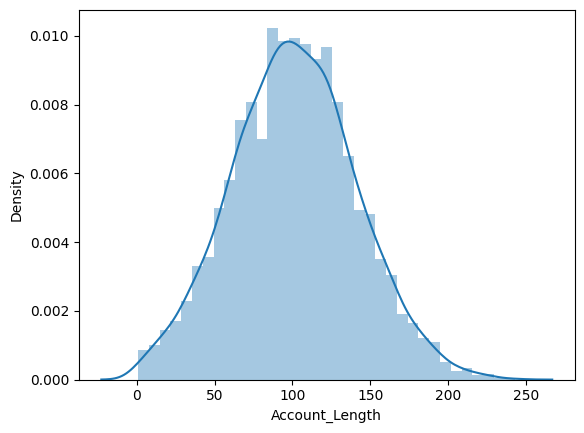

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


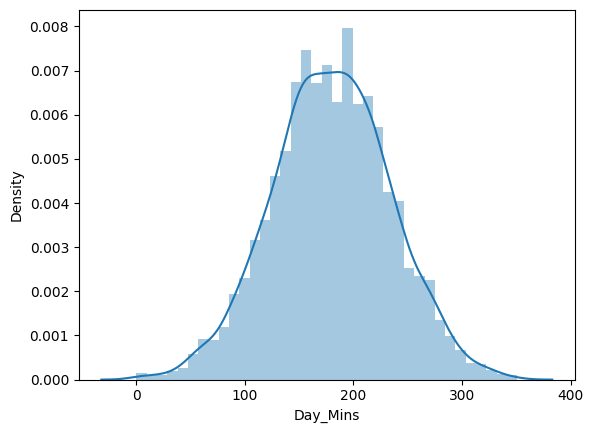

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


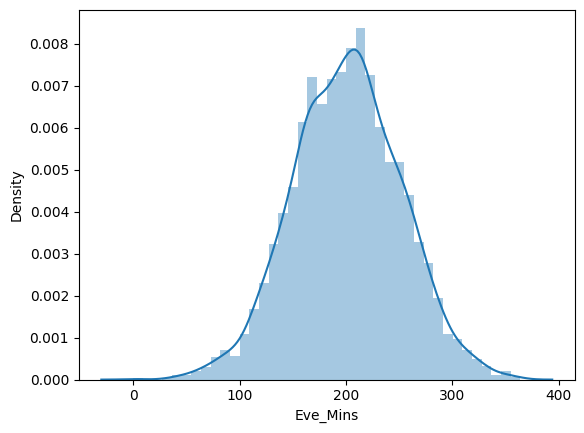

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


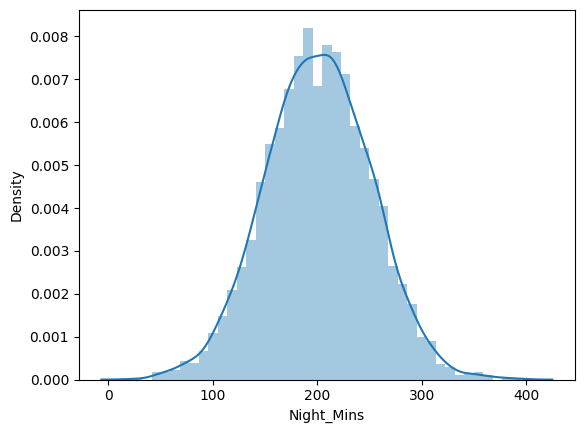

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


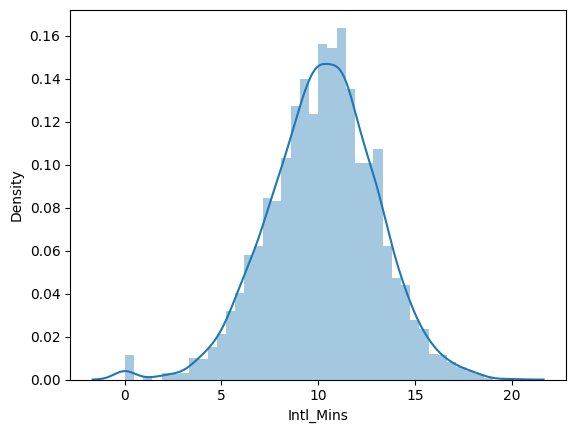

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


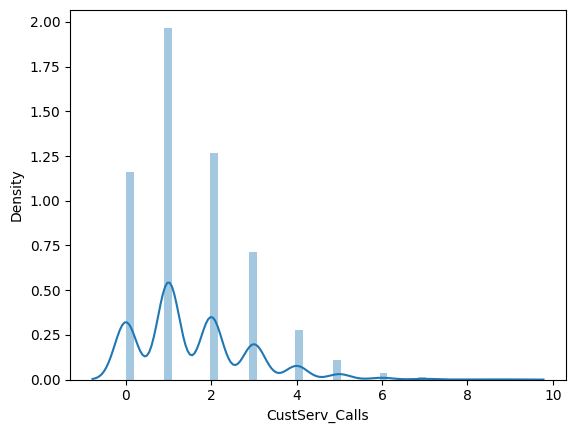

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


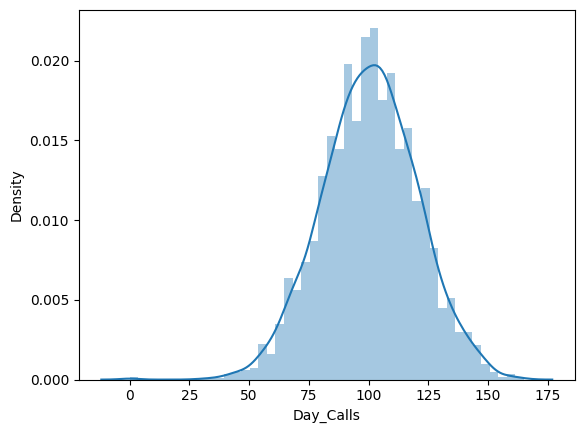

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


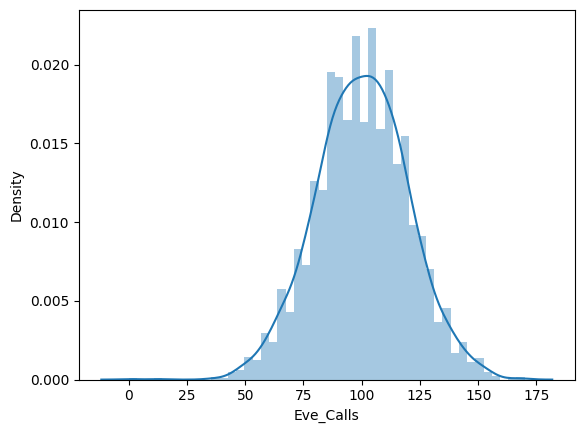

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


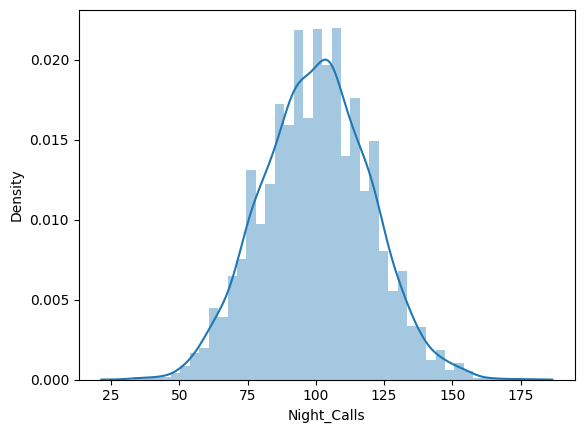

<ipython-input-13-794431794a90>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[var])


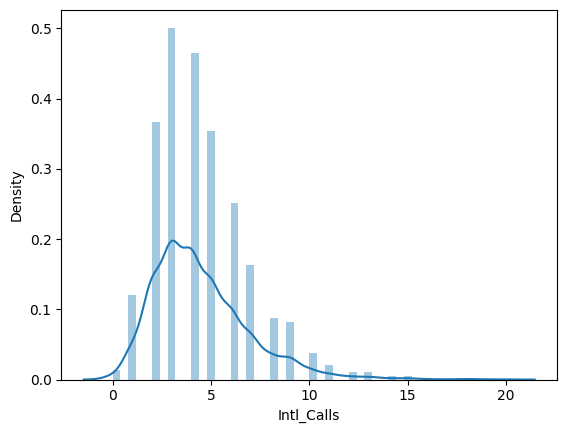

In [13]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

vars = ['Account_Length','Day_Mins','Eve_Mins','Night_Mins','Intl_Mins','CustServ_Calls','Day_Calls','Eve_Calls','Night_Calls','Intl_Calls']

for var in vars:

  # Visualize the distribution
  sns.distplot(telco[var])

  # Display the plot
  plt.show()

So, we find that many of the features are appear to be approximately normally distributed

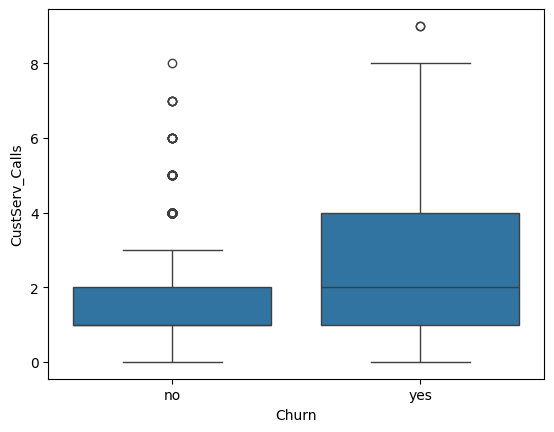

In [14]:
# customer service calls and churn


# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

# Display the plot
plt.show()

In the boxplot:
- middle line = median or Q2 (50th percentile)
- top of box = Q3 (75th %ile)
- bottom of box = Q1 (25th %ile)
- whiskers - extended to 1.5 x IQR beyond Q3 and Q1
- values beyond the whiskers are outliers and are shown as dots


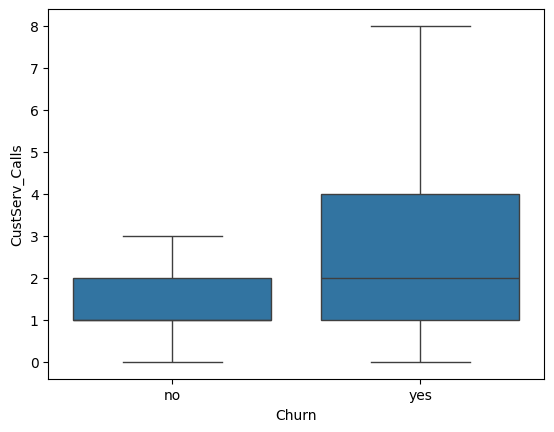

In [15]:
#boxplot with outliers removed

# Create the box plot without outliers
sns.boxplot(x='Churn', y='CustServ_Calls', data=telco, showfliers=False)

# Display the plot
plt.show()


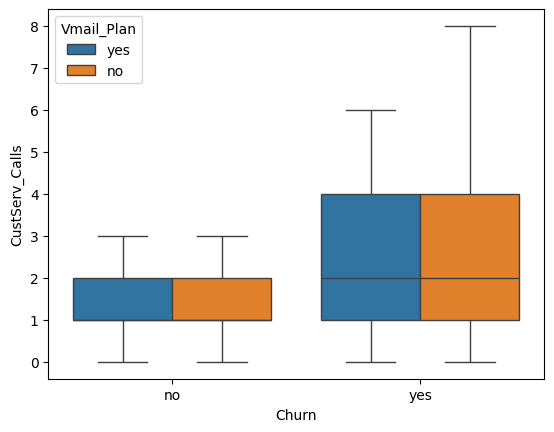

In [16]:
# customer service calls, churn and voice mail


# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            showfliers = False,
            hue = "Vmail_Plan")

# Display the plot
plt.show()

Not much of a difference when inspecting customer service call differences in voice mail plan subscribers

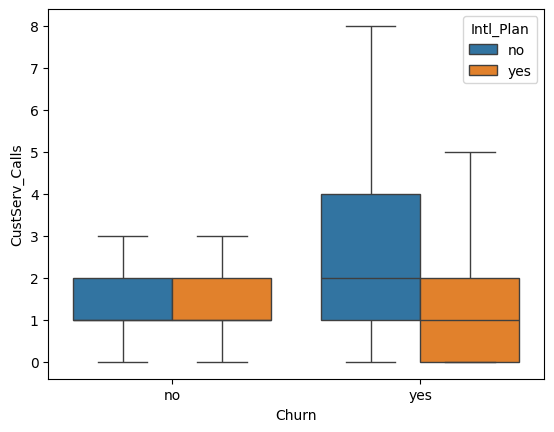

In [17]:
# customer service calls, churn and voice mail


# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            showfliers = False,
            hue = "Intl_Plan")

# Display the plot
plt.show()

It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

# Data Preprocessing

In [18]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

We can see that Churn, Intl_Plan, Vmail_Plan and State are object types that need to be encoded

###Binary Feature Encoding

In [19]:
#encoding churn, intl_plan and vmail_plan as binary features

# vmail_plan
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0 , 'yes':1})

# churn
telco['Churn'] = telco['Churn'].replace({'no':0 , 'yes':1})

# intl_plan
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0 , 'yes':1})

# Print the results to verify
telco.head()

<ipython-input-19-aa85c38288cf>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0 , 'yes':1})
<ipython-input-19-aa85c38288cf>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco['Churn'] = telco['Churn'].replace({'no':0 , 'yes':1})
<ipython-input-19-aa85c38288cf>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future 

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


###One Hot Encoding for State

In [20]:
#creating a separate dataframe with one hot encoding for different states

# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'],dtype = float)

# Print the head of telco_state
print(telco_state.head())

    AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL  ...   SD   TN   TX   UT  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    VA   VT   WA   WI   WV   WY  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 51 columns]


In [21]:
#pd.get_dummies?

In [22]:
telco_state

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Dropping Unnecessary Features

In [23]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [24]:
#dropping area_code, phone and state

telco = telco.drop(telco[['Area_Code','Phone','State']], axis=1)

telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge'],
      dtype='object')

Highly Correlated Features

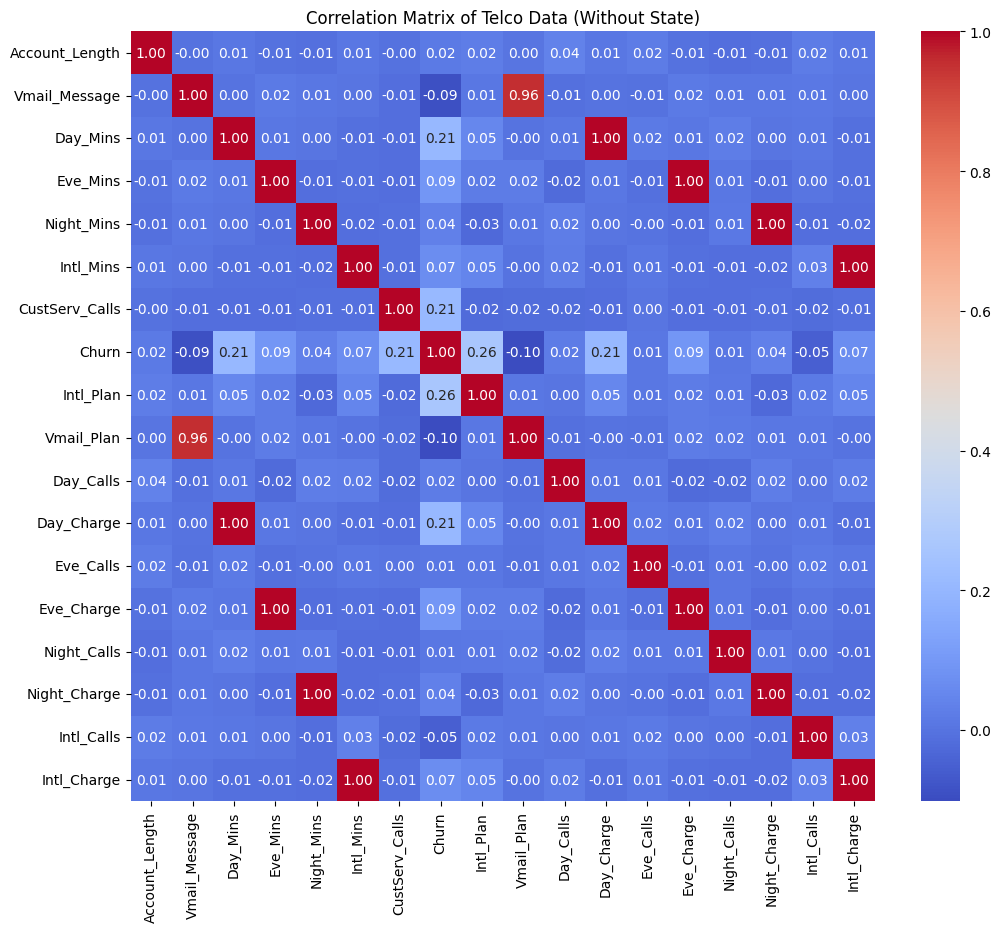

In [25]:
# correlation plot for telco_no_state

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = telco.corr()

# Create the correlation plot using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Telco Data (Without State)')
plt.show()


We find that the following features are very highly correlated:
- Day_Mins and Day_Charge
- Eve_Mins and Eve_Charge
- Night_Mins and Night_Charge
- Intl_Mins and Intl_Charge

The high correlation makes sense, so we will drop the charge variables to avoid redundancy.




In [26]:
telco = telco.drop(telco[['Day_Charge','Eve_Charge','Night_Charge','Intl_Charge']], axis=1)

In [27]:
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls'],
      dtype='object')

###Feature Scaling



In [28]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Eve_Calls,Night_Calls,Intl_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,100.114311,100.107711,4.479448
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,19.922625,19.568609,2.461214
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,87.000000,87.000000,3.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,100.000000,100.000000,4.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,114.000000,113.000000,6.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,170.000000,175.000000,20.000000


In [29]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Eve_Calls,Night_Calls,Intl_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,99,91,3
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,103,103,3
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,110,104,5
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,88,89,7
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,122,121,3


We can standardise the continuous variables as follows:

standardised_x = (x - mean_x)/stddev_x

This scales x so that standardised_x has mean=0 and standard deviation=1

<br>

Standardization scales features to have a mean of 0 and a standard deviation of 1, ensuring that all numerical features contribute equally to the model.

- Helps Gradient-Based Models (e.g., Logistic Regression)
Models like Logistic Regression, SVM, and Neural Networks rely on gradient descent.
If features have different scales (e.g., "Minutes Used" in hundreds vs. "Customer Service Calls" in single digits), larger values dominate the optimization process.
Standardization ensures faster and stable convergence.

- Does Not Affect Tree-Based Models (e.g., Decision Tree, Random Forest)
Decision Trees split data based on feature thresholds (not distance-based calculations).
Scaling does not affect the split conditions, so standardization is unnecessary.


In [30]:
'''
# Identify numerical and categorical columns
binary_cols = ['Churn','Intl_Plan', 'Vmail_Plan']  # Binary variables (0/1)
num_cols = [col for col in telco.columns if col not in binary_cols]  # Continuous variables

# Standardize only numerical features
scaler = StandardScaler()
telco_scaled = scaler.fit_transform(telco[num_cols])

# Convert back to DataFrame
telco_scaled_df = pd.DataFrame(telco_scaled, columns=num_cols)

# Retain binary categorical variables as they are
telco_final = pd.concat([telco_scaled_df, telco[binary_cols].reset_index(drop=True)], axis=1)

# Display first few rows
telco_final.head()
'''

"\n# Identify numerical and categorical columns\nbinary_cols = ['Churn','Intl_Plan', 'Vmail_Plan']  # Binary variables (0/1)\nnum_cols = [col for col in telco.columns if col not in binary_cols]  # Continuous variables\n\n# Standardize only numerical features\nscaler = StandardScaler()\ntelco_scaled = scaler.fit_transform(telco[num_cols])\n\n# Convert back to DataFrame\ntelco_scaled_df = pd.DataFrame(telco_scaled, columns=num_cols)\n\n# Retain binary categorical variables as they are\ntelco_final = pd.concat([telco_scaled_df, telco[binary_cols].reset_index(drop=True)], axis=1)\n\n# Display first few rows\ntelco_final.head()\n"

In [31]:
#telco_final.describe()

# Modelling

###Train Test Split

We do this to ensure that our model is neither overfitting (performing too well on training data but generalising poorly) nor underfitting (an oversly simple model that does not perform well on traiing or test data).

In [32]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets, using random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)


In [33]:
#train_test_split?

###Training and Evaluation - Logistic Regression, Decision Tree, Random Forest

In [34]:
#imports

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


Confusion Matrix -

A confusion matrix is a table used to evaluate the performance of a classification model by comparing predicted vs. actual values. It consists of four components:

- True Positive (TP): Correctly predicted positive cases.

- True Negative (TN): Correctly predicted negative cases.

- False Positive (FP): Incorrectly predicted positive (Type I error).

- False Negative (FN): Incorrectly predicted negative (Type II error).


```
              Predicted Positive    Predicted Negative
Actual Positive      TP                    FN
Actual Negative      FP                    TN

Overall accuracy = (TP+TN)/(TP+FP+FN+TN)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

```
<br>

Precision - Precision measures the proportion of correctly predicted positive instances out of all predicted positive instances.

Precision = TP/(TP+FP)


High Precision → Fewer false positives.
Useful When: False positives are costly (e.g., spam detection, fraud detection).

<br>

Recall (Sensitivity / True Positive Rate) - Recall measures the proportion of actual positive instances that were correctly predicted.

Recall = TP/(TP+FN)


High Recall → Fewer false negatives.
Useful When: Missing positive cases is costly (e.g., medical diagnosis, credit risk assessment).


A Confusion Matrix provides a comprehensive view of the model's performance, showing how well it distinguishes between classes. This is particularly useful when there is a class imbalance in the data (as is the case with our dataset where churning is much less common than customers not churning) as even relatively unsophisticated and inaccurate classification algorithms can give unreasonably high classification accuracy in some cases of class imbalance.

In some cases, it's important to strike a balance between precision and recall. A high precision with low recall means fewer false positives but potentially missing true positives, while high recall with low precision means catching more true positives at the cost of more false positives. The F1-score is often used to combine both into a single metric for balance.

F1-score = 2 x (precision x recall)/(precision + recall)

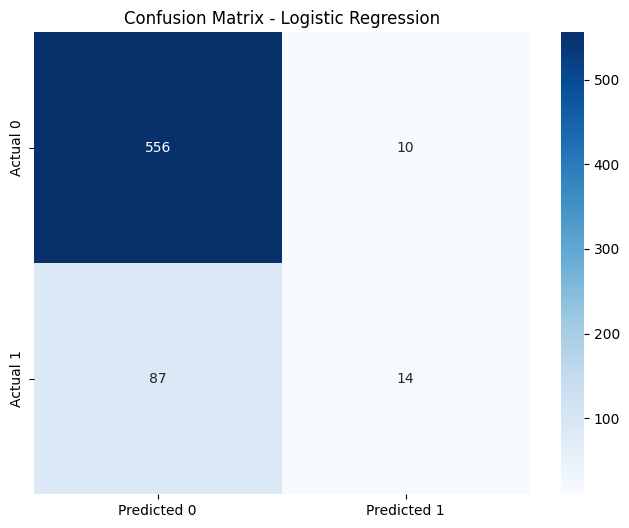

Logistic Regression - Precision: 0.58, Recall: 0.14, F1 Score: 0.224
Prediction Accuracy = 0.8545727136431784


In [39]:
# Logistic Regression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
print(f"Logistic Regression - Precision: {precision_logreg:.2f}, Recall: {recall_logreg:.2f}, F1 Score: {2*(precision_logreg*recall_logreg)/(precision_logreg+recall_logreg)}")
print(f'Prediction Accuracy = {logreg.score(X_test,y_test)}')


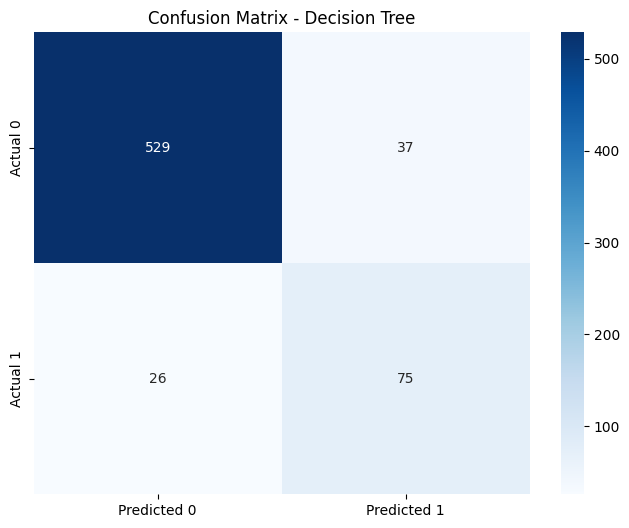

Decision Tree - Precision: 0.67, Recall: 0.74, F1 Score: 0.7042253521126761
Prediction Accuracy = 0.9055472263868066


In [40]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

cm_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()

precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
print(f"Decision Tree - Precision: {precision_dtree:.2f}, Recall: {recall_dtree:.2f}, F1 Score: {2*(precision_dtree*recall_dtree)/(precision_dtree+recall_dtree)}")
print(f'Prediction Accuracy = {dtree.score(X_test,y_test)}')

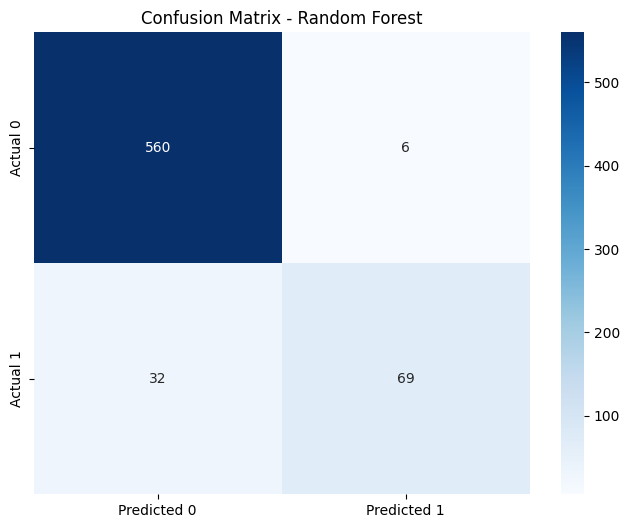

Random Forest - Precision: 0.92, Recall: 0.68, F1 Score: 0.7840909090909092
Prediction Accuracy = 0.9430284857571214


In [41]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.show()


precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest - Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1 Score: {2*(precision_rf*recall_rf)/(precision_rf+recall_rf)}")
print(f'Prediction Accuracy = {rf.score(X_test,y_test)}')

We find that:

- In terms of F1 score, random forest performs the best with a score of 0.79.

- In terms of precision, random forest performs the best with a precision score of 0.91, meaning that 91% of customer predicted to churn actually churned. This metric should be refered to when our priority is to minimise false positives.

- In terms of recall, decision tree performs the best with a recall score of 0.72, meaning that 70% of the customers who actually churned were also predicted to churn. This metric should be picked when our priority is to minimise false negatives.

- In terms of overall prediciton accuracy (precentage of users whose churn was correctly classified), random forest gives the highest accuracy of 94.3%.

###Why Do Different Models Perform Differently?

Different machine learning models have unique assumptions, learning strategies, and decision-making processes, which lead to variations in performance. Here’s why Logistic Regression, Decision Tree, and Random Forest performed differently:


1. Logistic Regression (Linear Model)
Assumes a linear relationship between features and the target variable.
Struggles with non-linear patterns in data.
Sensitive to outliers and multicollinearity.

Performance: Low recall means it struggles to detect churn cases because customer churn might follow a complex decision boundary, not just a linear one.

2. Decision Tree (Non-Linear Model)
Works by splitting data into decision nodes based on feature thresholds.
Can capture complex relationships and non-linear patterns.
Less sensitive to feature scaling but prone to overfitting if not properly tuned, they tend to be inflexible when it comes to classifying new samples.

Performance: Higher recall and precision because it learns interactions between features, making it better at capturing churn cases.

3. Random Forest (Ensemble Model)
Uses multiple Decision Trees and averages their predictions.
Reduces overfitting compared to a single Decision Tree. Random Forests combine the simplicity of Decision Trees with flexibility, resulting in improvements in accuracy.

Performance: Best overall, balancing recall and precision due to its robustness.

###ROC and AUC

Classification Evaluation Using ROC and AUC:

In binary classification, evaluating a model’s performance requires more than just accuracy. The Receiver Operating Characteristic (ROC) curve and Area Under the ROC Curve (AUC) provide a deeper understanding of how well a model distinguishes between classes.

<br>


ROC Curve:

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds. It summarises all the confusion matrices that different threshholds prdouced.


TPR (Sensitivity/Recall) = TP / (TP + FN) → Measures how well the model identifies actual positives.

FPR = FP / (FP + TN) → Measures how often the model incorrectly classifies negatives as positives.

A good model should have a curve that bends towards the top-left corner, indicating high TPR with low FPR.

<br>

AUC (Area Under the ROC Curve):

The AUC value ranges from 0 to 1 and quantifies the overall ability of the model to distinguish between classes.


AUC = 1 → Perfect classifier

AUC > 0.9 → Excellent

0.7 ≤ AUC < 0.9 → Good

0.5 ≤ AUC < 0.7 → Poor (close to random guessing)

AUC = 0.5 → No discrimination capability

<br>

Interpretation:


A higher AUC indicates a better-performing model.
AUC close to 0.5 suggests the model is no better than random guessing.

If AUC is below 0.5, the model’s predictions are worse than random (possibly misclassified).

Using ROC-AUC, you can compare different models and select the one that best balances sensitivity and specificity.

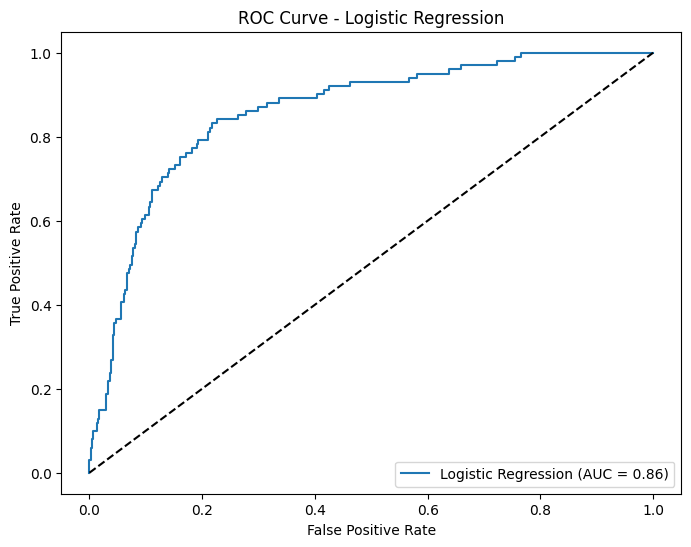

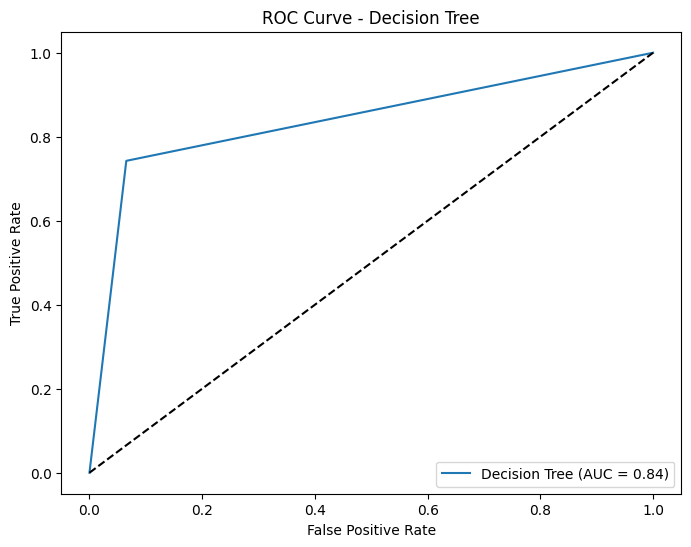

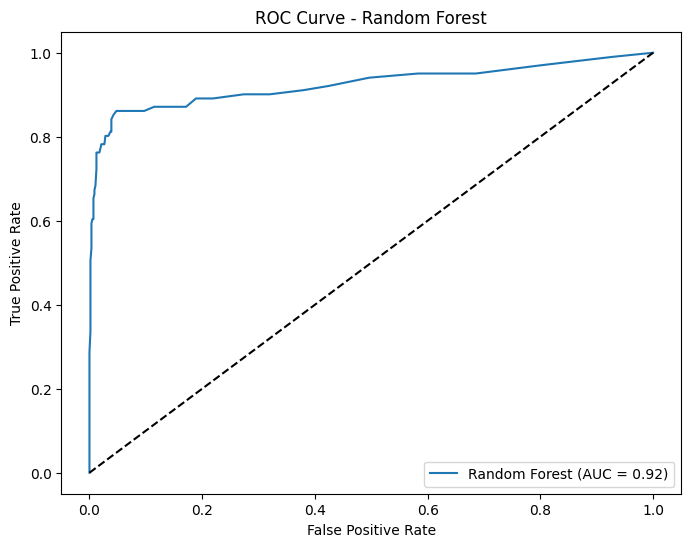

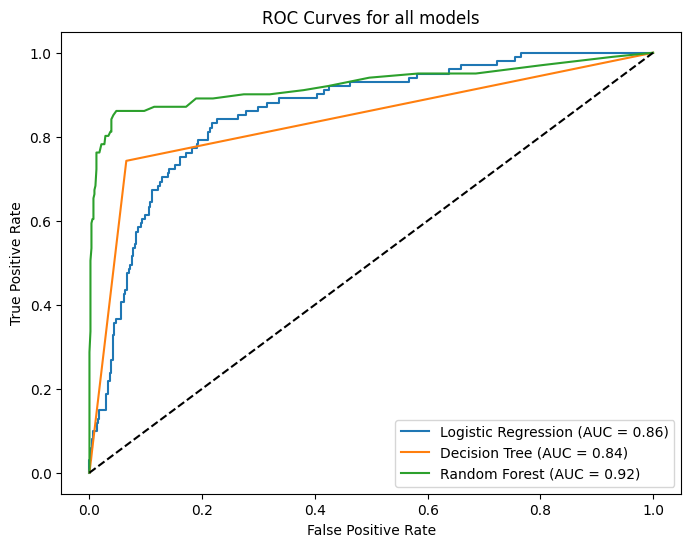

In [44]:
# plotting roc and auc for each of the three models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC and AUC
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Decision Tree ROC and AUC
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_prob_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Random Forest ROC and AUC
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Combined ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all models')
plt.legend(loc='lower right')
plt.show()

Interpretation:

<br>

1. Random Forest (AUC = 0.92)

This model has the highest AUC, meaning it best distinguishes between churners and non-churners.
The curve bends sharply toward the top-left, showing high true positive rate (TPR) and low false positive rate (FPR) at most thresholds.
This suggests strong predictive power with good balance between recall and precision.


2. Logistic Regression (AUC = 0.86)

Performs well, but not as strong as the Random Forest model.
The curve still shows good discrimination but is slightly less steep.
AUC of 0.86 is considered good, meaning the model makes reliable churn predictions.


3. Decision Tree (AUC = 0.84)

Has the lowest AUC among the three models, but still performs reasonably well.
The curve is more linear compared to the others, indicating it is less capable of distinguishing churners from non-churners than Logistic Regression and Random Forest.
AUC of 0.84 is still decent, but the model might be prone to overfitting or suboptimal feature selection.

<br>

Key Takeaways for Churn Prediction:

Random Forest is the best model for this dataset, as it achieves the highest AUC (0.92).

Logistic Regression is a strong alternative, performing well with an AUC of 0.86.

Decision Tree has the weakest performance, but is still useful. It may benefit from pruning or hyperparameter tuning.

If interpretability is important, we may prefer Logistic Regression (as it provides clear coefficients). However, if we prioritiae predictive power, Random Forest is the best choice.


# References

https://medium.com/@chisomnnamani/telecom-customer-churn-data-exploration-5ef902ffc4d1

https://medium.com/@samrand-toufani/customer-churn-prediction-in-the-telecommunication-industry-a21f596f562b